# Lecture 11 - Midterm Exam Review

# Midterm Exam: <font color=blue>Monday, October 10</font> 

| Section|	Date |	Time |	Location |	Modality |
| -- | -- | --- | ---| ---|
| EEL5840 On-campus |	Monday, October 10 |	7:20 PM - 9:20 PM |	WEIM 1064 |	in-person |
| EEL5840 EDGE/Online |	Monday, October 10 |	within 24 hours |	Honorlock |	online |

## EDGE/Online Exams

* Online exams will be proctored with Honolorck. Find more information here: https://distance.ufl.edu/proctoring/

* Install [**CamScanner app**](https://www.camscanner.com/) on your phone.

* **Bring 6 clean sheets to write your answers.** 

* Show to the camera all of your clean paper.

* You may call me at (352) 392-6502 if you have any questions. (I do not receive texts in this number.)

* Once the 2 hours have elapsed, please use the **additional 10 minutes to scan your handwritten solutions** (including your formula sheet) and upload it to Canvas as a single PDF file.

## Exam Details

* **Coverage**: lectures 1-11 (modules 1-5)

* **Practice exam**: available in the [Assignment-Solutions repo](https://github.com/UF-EEL5840-F22/Assignment-Solutions)
    * Solutions have been posted
    
* **Allowed Material**
    * 1-page letter-sized of formulas (front and back, handwritten or typed). **Formulas only!** **Do not include** pseudo-code, solved exercises, lecture derivations or any written definitions.
    * Scientific calculator

* **Total time**: 2 hours

## Midterm Exam Coverage

The midterm exam will cover all materials from Lecture 1-10 + today's midterm review. These include:

1. **Introduction to Machine Learning <font color=blue>(Lectures 1-2)</font>**
    * Definition of Machine Learning, Artificial Intelligence and Deep Learning
    * Types of learning in Machine Learning
    * Supervised Learning diagram
    * (Linear) Regression
    * Performance Metrics for regression: error metrics, Q-Q plot
    
2. **Experimental Design and Analysis <font color=blue>(Lectures 3-5)</font>**
    * Feature representation: polynomial basis function, radial basis function, etc. 
        * Basis functions in general
    * Model selection
    * Occam's Razor
    * Generalization
    * Regularization: ridge and lasso
    * Cross-Validation
    * The No Free Lunch Theorem
    * The Bias-Variance Trade-Off
    * Experimental Design
    * Hyperparameters tuning
    * The Curse of Dimensionality
    
3. **Bayesian Learning <font color=blue>(Lectures 6-8)</font>**
    * Frequentist vs Bayesian statistics
    * Bayesian interpretation of Regression Least Squares Objective Function 
    * Maximum Likelihood Estimation (MLE)
    * Maximum A Posteriori (MAP)
    * Bayesian Prior Equivalence
    * Conjugate Priors, Online update
    
4. **Generative Classification <font color=blue>(Lectures 9-10)</font>**
    * Distinction between classification and regression
    * Probabilistic Generative Models
    * Naive Bayes Classifier

---

## How to prepare for exam

**This is a suggestion only.**

1. Review/read all Notebooks.

2. Create your formula sheet. **Do not include written descriptions, pseudo-code or solved exercises (including derivations).** 

3. Review/redo exercises from HW1. 

4. Review/redo exercises from SA1 and SA2.

5. Review discussion boards 1 and 2.

6. Solve practice exam provided.

---

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# [Discussion Board Questions](https://ufl.instructure.com/courses/464118/discussion_topics/3625863)

Thank you for posting your questions!

## Post 1 & Post 7

*How do we determine the update function for alpha and beta for different distributions?* - D. Lentini

*Please go through step by step the MLE/MAP derivations* - T. Christensen

Let's consider [exercise 6](https://github.com/UF-EEL5840-F22/Assignment-Solutions/blob/main/Midterm%20-%20review%20from%20Summer%202022/Midterm_Exam_EEL5840_Summer_2022.pdf) from the practice midterm.

> Suppose you have a training set with $N$ data points $\{x_i\}_{i=1}^N$, where $x_i\in\mathbb{Z}_0^+$ (set of nonnegative integers - $0,1,2,3,\dots$). Assume the samples are independent and identically distributed (i.i.d.), and each sample is drawn from a Geometric random variable with probability mass function:
\begin{align*}
    P(x|\rho) = \rho(1-\rho)^x
\end{align*}

> Moreover, consider the Beta density function as the prior probability on the success probability, $\rho$,
\begin{align*}
    P(\rho|\alpha,\beta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\rho^{\alpha-1}(1-\rho)^{\beta-1}
\end{align*}

> 1. Derive the maximum likelihood estimate (MLE) for the rate parameter $\rho$. Show your work.
> 2. Derive the maximum a posteriori (MAP) estimate for the rate parameter $\rho$. show your work.
> 3. Is the Beta distribution a conjugate prior for the success probability, $\rho$, of the Geometric distribution? Why or why not?
> 4. Suppose you would like to update the Beta prior distribution and the MAP point estimation in an online fashion, as you obtain more data. Write the pseudo-code for the online update of the prior parameters. In your answer, specify the new values for the parameters of the prior.

## Post 2

*In which case should we apply .fit, .transform and .fit_transform and what are the differences between those methods? Thanks!* - J. Ma

Let's consider the crab dataset from SA2:

In [2]:
data = pd.read_csv("crab.txt", delimiter="\t")
data

,Species,FrontalLip,RearWidth,Length,Width,Depth,Male,Female
0,0,20.6,14.4,42.8,46.5,19.6,1,0
1,1,13.3,11.1,27.8,32.3,11.3,1,0
2,0,16.7,14.3,32.3,37.0,14.7,0,1
3,1,9.8,8.9,20.4,23.9,8.8,0,1
4,0,15.6,14.1,31.0,34.5,13.8,0,1
...,...,...,...,...,...,...,...,...
195,1,12.3,11.0,26.8,31.5,11.4,1,0
196,1,12.0,11.1,25.4,29.2,11.0,0,1
197,1,8.8,7.7,18.1,20.8,7.4,1,0
198,1,16.2,15.2,34.5,40.1,13.9,0,1


In [3]:
# Partitioning the data into training and test sets

X_train = data.iloc[:140,1:].to_numpy()
t_train = data.iloc[:140,0].to_numpy()

X_test = data.iloc[140:,1:].to_numpy()
t_test = data.iloc[140:,0].to_numpy()

X_train.shape, X_test.shape, t_train.shape, t_test.shape

((140, 7), (60, 7), (140,), (60,))

Standardizing data:

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# This pipeline will apply Standardization to all numerical attributes 
# The attributes that are one-hot/interger-encoded (such as gender) will remain as is

scaling_pipeline = ColumnTransformer([('num_attribs', StandardScaler(), list(range(5)))],
                                    remainder='passthrough')
scaling_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_attribs', StandardScaler(),
                                 [0, 1, 2, 3, 4])])

In [5]:
scaling_pipeline.fit(X_train)

# The fit() method learns the necessary parameters of the pipeline.
# Since this pipeline includes preprocessing scalars, it will learn the mean and std for each attriute
# If it were a classifier/regression, it will train all the parameters associated with that classifier/regression algorithm

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_attribs', StandardScaler(),
                                 [0, 1, 2, 3, 4])])

In [9]:
# You can access the trained attributes of this object

scaling_pipeline.transformers_[0][1].mean_

array([15.61428571, 12.75928571, 32.17      , 36.46642857, 14.05785714])

In [10]:
# Check

X_train.mean(axis=0)

array([15.61428571, 12.75928571, 32.17      , 36.46642857, 14.05785714,
        0.51428571,  0.48571429])

In [11]:
scaling_pipeline.transformers_[0][1].var_

array([11.48222449,  6.45212806, 47.42667143, 58.38537296, 11.11100969])

In [12]:

X_train.var(axis=0)

array([11.48222449,  6.45212806, 47.42667143, 58.38537296, 11.11100969,
        0.24979592,  0.24979592])

In [13]:
# The method transform() will apply these parameters to the input data.
# In this case, each feature will be scale with (f-mu)/std

X_train_scaled = scaling_pipeline.transform(X_train)

X_test_scaled = scaling_pipeline.transform(X_test)

In [14]:
X_train_scaled[:2,:5]


array([[ 1.4713445 ,  0.64592407,  1.54355441,  1.31311728,  1.66265045],
       [-0.68297366, -0.65323536, -0.63455623, -0.54527039, -0.82736092]])

In [15]:
# Check

np.divide(X_train-X_train.mean(axis=0), X_train.std(axis=0))[:2,:5]

array([[ 1.4713445 ,  0.64592407,  1.54355441,  1.31311728,  1.66265045],
       [-0.68297366, -0.65323536, -0.63455623, -0.54527039, -0.82736092]])

In [16]:
# The method fit_transform() trains the parameters and applies them to the input data
# This method should only be used for the training set

X_train_scaled_2 = scaling_pipeline.fit_transform(X_train)
X_test_scaled_2 = scaling_pipeline.transform(X_test)

In [18]:
## Loading a matrix diagonally

np.array([[1,2],[2,4]]) + 0.5*np.eye(2)

array([[1.5, 2. ],
       [2. , 4.5]])

## Post 3

*When should we and when should we not normalize data before modeling?* - S. Kucharski

Always normalize data! 

This is especially important when working with algorithms that make use of distances and other similarities measures for finding patterns.

## Post 4 & Post 8

*Could you please go through the Bayesian interpretation? Like the theory, the advantage and when is the appropriate time to use it.* - A. Jiang

*In class, you mentioned how if there is a right skew, you would want to use a Laplacian. Can you expand on what right skew means?* - B. Emison

* Correction: the Laplacian distribution has skewness 0. Meaning that it is symmetric wrt to its mean. In other words, the 3rd central moment of the Laplacian RV $X$ is 0, i.e. $E[(X-E[X])^3]=0$.

* The Exponential and Gamma RVs are examples of RVs with positive skew.

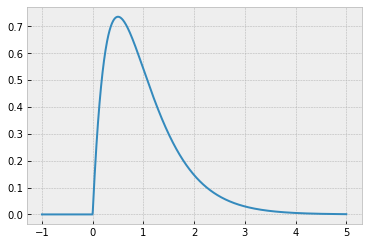

In [19]:
from scipy import stats

alpha=2
beta=2
X = stats.gamma(a=alpha,scale=1/beta)
xline = np.linspace(-1,5,1000)

plt.plot(xline, X.pdf(xline));

## Post 5 & Post 6

*If there is time during the review session can we review mixture models since lecture 10 was cut short last week? Or at least can you review what we will be expected to know for the exam regarding that topic?* - S. Kucharski

*We didn't have enough time in Lecture 9 and 10 to go deep into "Mixture Models", "Gaussian Mixture Models (GMM)" and "the Expectation-Maximization (EM) Algorithm". I see them in the practice questions. Are these part of the mid-term? If so, can we review the key concepts in terms of what we are expected to know? Thanks.* - Z. Zong

Mixture Models (including Gaussian Mixture Models) and the EM algorithm will not be assessed in the midterm exam.

## Post 9

*After performing k-fold cross validation in HW1 P2, I noticed it was more difficult than I thought to select the best regularizer hyperparameter that repeatably minimized the error in the validation set. Could you go over some strategies/approaches we should take to interpret the results of cross validation and select the best hyperparameter set, specifically regarding the regularizer hyperparameter? There are a lot of really good examples of what an overfit model looks like during cross validation of the model order, but less so for regularizer terms. How big is too big for a regularizer?* - C. Charters

---